# Fractal Geometry of Cumulus Clouds


 Write somethong!


In [10]:
from IPython.display import Image
%pwd

'/tera/users/loh/repos/fractal_clouds/notebook'

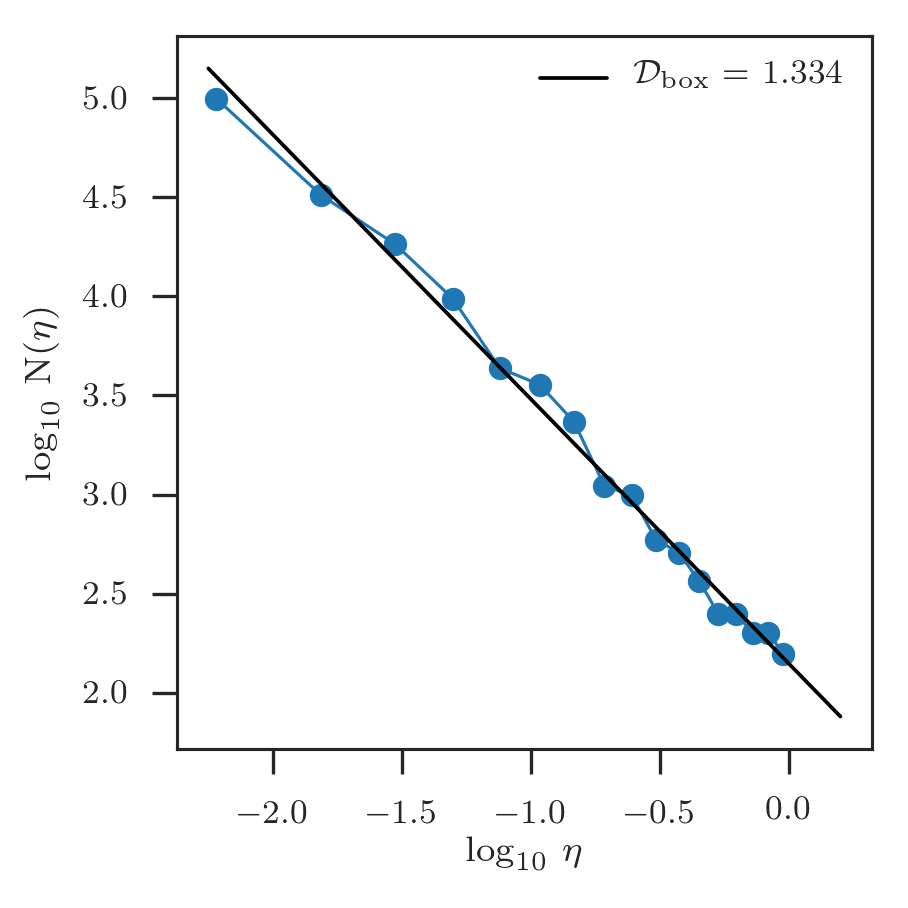

In [11]:
Image(filename='../png/calc_fdim.png', width=450)